# Homework 2 Part One: Charbel Yammine

The work for homework two.

## Preliminaries

In [1]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

Import commonly used libraries and magic command for inline plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from whatif import Model
from whatif import get_sim_results_df

In [3]:
%matplotlib inline

# Work

This is where work gets done.

## 1a — Base Model

In [4]:
# Created an OO-model
class SingleProductSPF(Model):
    def __init__(self, fixed_cost=5000, var_cost=100, selling_price=115, spf_constant=4900, spf_linear=-35, spf_quadratic=0.06):
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_constant = spf_constant
        self.spf_linear = spf_linear
        self.spf_quadratic = spf_quadratic
        
    def demand(self, selling_price=None):
        if selling_price is None:
            selling_price = self.selling_price
        demand = self.spf_constant + self.spf_linear * selling_price + self.spf_quadratic * selling_price ** 2
        return demand


    def revenue(self, selling_price):
        return self.demand(selling_price) * selling_price

    def cost(self, selling_price):
        cost = self.fixed_cost + self.var_cost * self.demand(selling_price)
        return cost
    
    def profit(self, selling_price=None):
        if selling_price is None:
            selling_price = self.selling_price
        profit = self.revenue(selling_price) - self.cost(selling_price)
        return profit


## 1b — 1-way Data Table

In [5]:
# Create the model object
model = SingleProductSPF()
# Generate data table
outputs = ['profit', 'demand']
dt_param_grid = {'selling_price': np.arange(80, 150, 10)}
data_table = model.data_table(dt_param_grid, outputs)

In [6]:
data_table


,selling_price,profit,demand
0,80,-54680.0,2484.0
1,90,-27360.0,2236.0
2,100,-5000.0,2000.0
3,110,12760.0,1776.0
4,120,26280.0,1564.0
5,130,35920.0,1364.0
6,140,42040.0,1176.0


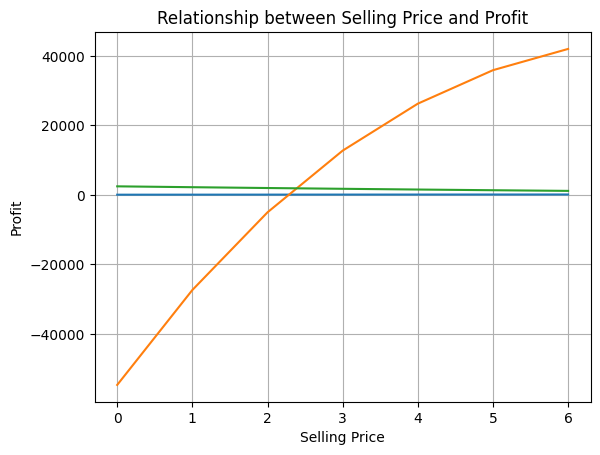

In [7]:
# Plotted data table
def plot_data_table():
    plt.plot(data_table)
    plt.xlabel('Selling Price')
    plt.ylabel('Profit')
    plt.title('Relationship between Selling Price and Profit')
    plt.grid(True)
    plt.show()
plot_data_table()

## 1c — Break Even

In [8]:
# Using goal_seek to find the break even.
print(model.goal_seek('profit', 0, 'selling_price', 80, 140))

102.57578606424767


## 1d — 2-way Data Table

In [9]:
# Generate data table
outputs = ['profit', 'demand']
dt_param_grid = {'selling_price': np.arange(80, 150, 10), 'var_cost': np.arange(85, 120, 5)}
data_table = model.data_table(dt_param_grid, outputs)

In [10]:
data_table

,selling_price,var_cost,profit,demand
0,80,85,-17420.0,2484.0
1,80,90,-29840.0,2484.0
2,80,95,-42260.0,2484.0
3,80,100,-54680.0,2484.0
4,80,105,-67100.0,2484.0
5,80,110,-79520.0,2484.0
6,80,115,-91940.0,2484.0
7,90,85,6180.0,2236.0
8,90,90,-5000.0,2236.0
9,90,95,-16180.0,2236.0


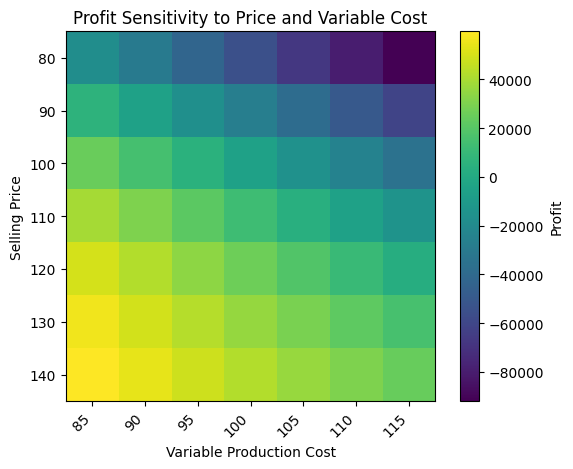

In [11]:
# Define the parameter grid
selling_prices = np.arange(80, 150, 10)
variable_costs = np.arange(85, 120, 5)

# Extract profit values from the data table and convert to a NumPy array
profits = data_table['profit'].to_numpy()

# Reshape profit values into a grid
profits_grid = profits.reshape((len(selling_prices), len(variable_costs)))

# Create the heatmap
fig, ax = plt.subplots()
heatmap = ax.imshow(profits_grid, cmap='viridis')

# Set the tick labels and positions for the axes
ax.set_xticks(np.arange(len(variable_costs)))
ax.set_yticks(np.arange(len(selling_prices)))
ax.set_xticklabels(variable_costs)
ax.set_yticklabels(selling_prices)

# Set the axis labels and title
ax.set_xlabel('Variable Production Cost')
ax.set_ylabel('Selling Price')
ax.set_title('Profit Sensitivity to Price and Variable Cost')

# Create a colorbar
cbar = fig.colorbar(heatmap)
cbar.set_label('Profit')

# Rotate the tick labels on the x-axis
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()


## 1e — Digging Deeper

In [12]:
# Using goal_seek to find the break even.
print(model.goal_seek('profit', 0, 'selling_price', 80, 250))

None


Immediately after using goal_seek() with the ranges of 80-250 I have found that it doesn't return a value at all... Which is interesting because I double checked to make sure that the code was correct by simply asking it to print the value (as seen with the prior goal seek) but as I deduced, there is nothing to return. I am guessing this has something to do with the values given but I am still unsure exactly why...

In [13]:
# Generate data table
outputs = ['profit', 'demand']
dt_param_grid = {'selling_price': np.arange(80, 260, 10)}
data_table = model.data_table(dt_param_grid, outputs)

In [14]:
data_table

,selling_price,profit,demand
0,80,-54680.0,2484.0
1,90,-27360.0,2236.0
2,100,-5000.0,2000.0
3,110,12760.0,1776.0
4,120,26280.0,1564.0
5,130,35920.0,1364.0
6,140,42040.0,1176.0
7,150,45000.0,1000.0
8,160,45160.0,836.0
9,170,42880.0,684.0


However after observing the data table and acknowledging how the data is constructed I have a better defined conclusion. Because of the way that we extended the data in this second example we can notice that profit takes a steep loss according to the extreme lack of demand, more than likely due to the fact that price has become too steep to begin with. As a result: it is hard to return a proper value in goal_seek because of the fact that it is accounting for both negative demand and negative profit for the end value. (How can you do business, and make a profit if there is no demand?)

## 1f — Simulation

In [15]:
# Generate random variates following a uniform distribution between 80 and 120
uniform_variates = np.random.uniform(low=80, high=120)

# Create the random_inputs dictionary
random_inputs = {'selling_price': uniform_variates}

# Specify the outputs you want to observe
outputs = ['profit']

# Call the simulate function with the random_inputs and outputs
results = model.simulate(random_inputs, outputs)


In [16]:
results

[{'scenario_base_vals': {'fixed_cost': 5000,
   'var_cost': 100,
   'selling_price': 115,
   'spf_constant': 4900,
   'spf_linear': -35,
   'spf_quadratic': 0.06},
  'scenario_num': 0,
  'scenario_vals': {},
  'output': {'profit': 5795.332959709893}}]

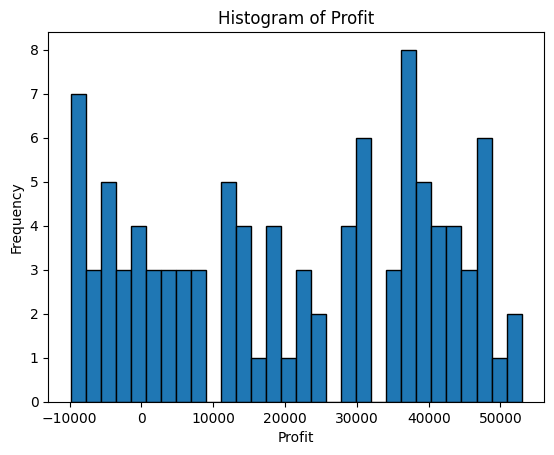

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of simulation replications
n_replications = 100

# Generate random variates following a uniform distribution for variable cost between 80 and 120
variable_cost_variates = np.random.uniform(low=80, high=120, size=n_replications)

# Create the random_inputs dictionary
random_inputs = {'var_cost': variable_cost_variates}

# Specify the outputs you want to observe
outputs = ['profit']

# Call the simulate function with the random_inputs and outputs
results = model.simulate(random_inputs, outputs)

# Extract the profit values from the results
profits = [result['output']['profit'] for result in results]

# Plot the histogram of profit
plt.hist(profits, bins=30, edgecolor='black')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Histogram of Profit')
plt.show()


In [18]:
# Convert profits to a regular Python list
profits = [result['output']['profit'].tolist() for result in results]

# Flatten the list of profits
profits = [profit for sublist in profits for profit in sublist]

# Calculate the probability of negative profit as a percentage
probability_negative_profit = (sum(profit < 0 for profit in profits) / len(profits)) * 100

print(f"The probability of profit being negative based on the simulation is: {probability_negative_profit:.2f}%")


The probability of profit being negative based on the simulation is: 21.00%
